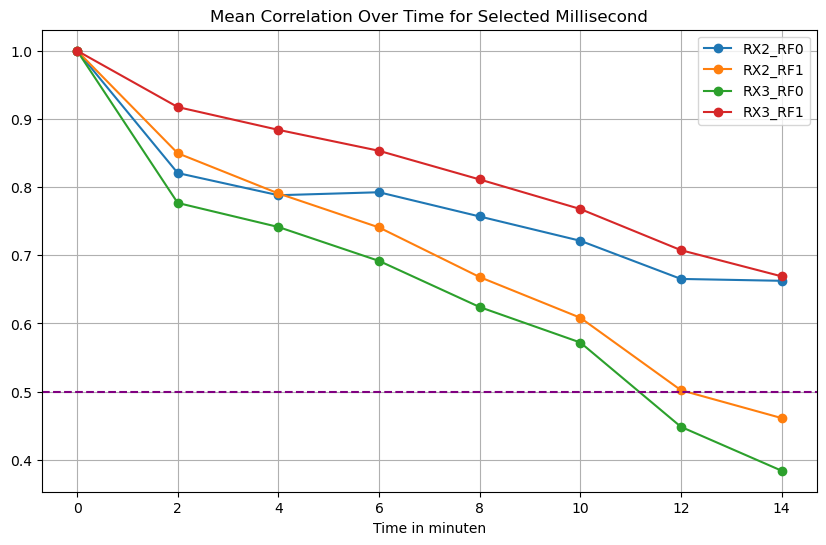

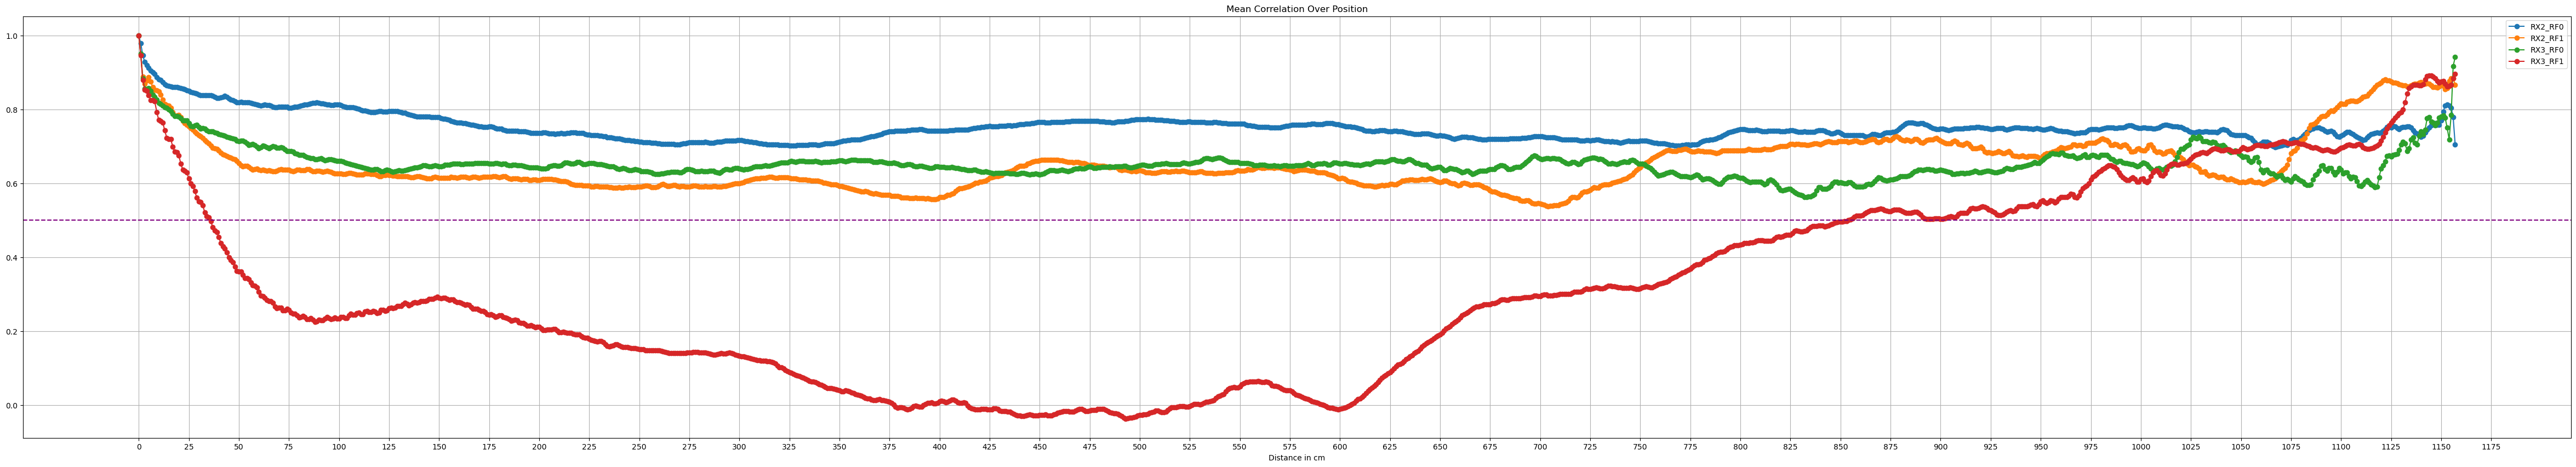

'for i in range(data.shape[0]-1):  \n            temp_correlations_self = []\n            self_corr_matrix = np.corrcoef(data[i, :], data[i, :])  \n            temp_correlations_self.append(self_corr_matrix[0][0])\n            print(f"i:{i}, temp self correlation: {temp_correlations_self}")\n\n    correlation.append(np.nanmean(temp_correlations_self) )'

In [ ]:
#%%

#%matplotlib widget
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from matplotlib.widgets import Slider
import json

# Informationen
load_path = "/media/student/SEW/Bearbeitet_Data/Rx3/Tag2_Scenario3_Besondermessungen"
round_numbers = [243,244,245,246,247,248,250,251,252,253,254,257,258,259,260,261,262,264,265,266]
#round_numbers = [243,244]
#round_number =244
seconds = []

num_round = len(round_numbers)
num_sec = 20

num_delay = 512
num_millisecond = 1000
'''data = np.zeros((num_round,num_sec*num_millisecond))
for filenames in os.listdir(load_path):
    if filenames.split("_")[5] == '1' :
        
        for round_idx, round_number in enumerate(round_numbers):
                #print(f"all file:{filenames}")
            if filenames.startswith(f"Round_{round_number}") and filenames.endswith(".mat"):        
                data_round = []
                
                            #print(filenames)
                        
                r = int (filenames.split("_")[7].replace(".mat",""))
                if r > 20:
                        continue

                    #seconds.append((round_number,r))

                file_path = os.path.join(load_path,filenames)
                mat = scipy.io.loadmat(file_path)
                            
                cirs = mat['cirs']
                                    #print(mat)
                                    #plt.plot(10*np.log10(np.abs(cirs[29:150]) ** 2 ))
                start_idx = (r - 1) * num_millisecond    
                #round_idx = round_number
                for ms in range(num_millisecond):  

                    data_1 = np.sum(np.abs(cirs[:,ms]) ** 2 )
                                        #print (f"round:{round_number},second:{r},data_1:{data_1}")

                    #data_round.append(data_1)
                    #print(len(data_round))
                    data[round_idx,start_idx+ms]=data_1
#print(f"data  :{10*np.log10(data)}")

    

#data = np.array(data) 

#np.save('data_all_for_BesondereMessungen_RX3_RF1.npy',data)'''
data = np.load('data_all_for_BesondereMessungen_RX3_RF1.npy')



###########################################################     Correlation-time-calculation   ###########################################################

num_k = data.shape[0] - 1
correlation_means_2_0 = np.load('correlation_mean_RX2_RF0.npy')
correlation_means_2_1 = np.load('correlation_mean_RX2_RF1.npy')
correlation_means_3_0 = np.load('correlation_mean_RX3_RF0.npy')
correlation_means_3_1 = np.load('correlation_mean_RX3_RF1.npy')


correlation_means_2_0 = correlation_means_2_0[0:8]
correlation_means_2_1 = correlation_means_2_1[0:8]
correlation_means_3_0 = correlation_means_3_0[0:8]
correlation_means_3_1 = correlation_means_3_1[0:8]
# Figure 
plt.subplots(figsize=(10, 6))
x_values = np.arange(0, 8) * 2
plt.plot(x_values,correlation_means_2_0, marker='o',label ='RX2_RF0')
plt.plot(x_values,correlation_means_2_1, marker='o',label ='RX2_RF1')
plt.plot(x_values,correlation_means_3_0, marker='o',label ='RX3_RF0')
plt.plot(x_values,correlation_means_3_1, marker='o',label ='RX3_RF1')
plt.title('Mean Correlation Over Time for Selected Millisecond')
plt.xlabel('Time in minuten')
plt.xticks(x_values) 
plt.axhline(y=0.5, color ='purple', linestyle='--')
plt.legend()
plt.grid(True)
#plt.show()


###########################################################     Correlation-Position-calculation   ###########################################################

rsp_position_2_0 = np.load('rsp_position_RX2_RF0.npy')  
rsp_position_2_1 = np.load('rsp_position_RX2_RF1.npy')  
rsp_position_3_0 = np.load('rsp_position_RX3_RF0.npy') 
rsp_position_3_1 = np.load('rsp_position_RX3_RF1.npy') 

correlation_means_2_0 = np.load('correlation_mean_position_RX2_RF0.npy')
correlation_means_2_1 = np.load('correlation_mean_position_RX2_RF1.npy')
correlation_means_3_0 = np.load('correlation_mean_position_RX3_RF0.npy')
correlation_means_3_1 = np.load('correlation_mean_position_RX3_RF1.npy')

'''position = np.load('position_scenario3.npy', allow_pickle=True)
delta_time = []
delta_dis = []
all_speed = []
i=0
while i < len(position)-1:  
    delta_x = 0
    
    for j in range(i + 1, len(position)):
    
        time1, x1, y1 = position[i]['Time (s)'], position[i]['X (m)'], position[i]['Y (m)']
        time2, x2, y2 = position[j]['Time (s)'], position[j]['X (m)'], position[j]['Y (m)']
        distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        #print(f"Distance between time {time1}s and {time2}s: {distance} meters")
        #time_diff = time2 - time1
        #speed = distance / time_diff
        #all_speed.append(speed)
        #print(f"Speed between time {time1}s and {time2}s: {speed}")
    
        if distance >= 0.01 :
            delta_time.append(time2)
            i = j
            #print (f"Time : {time2} seconds")
            break
    if j == len(position) -1 :
        i = len(position)
        break



#print(len(delta_time))


rsp_position = []
for time in delta_time:
    rsp_position.append(data[:,int(time*1000)])
rsp_position =  np.array(rsp_position)
#print(rsp_position)
#print(f"shape:{rsp_position.shape}")       
rsp_filename = f'rsp_position_RX3_RF1.npy'
np.save (rsp_filename,rsp_position)
           

#Correlation


print (f"number k :{num_k_pos}")


correlations = []
for k  in range(rsp_position.shape[0]):
        temp_correlations = []
        for i in range (rsp_position.shape[0]- k ):
            
                corr = np.corrcoef(rsp_position[i,:],rsp_position[i + k  ,:])
                temp_correlations.append(corr[0][1])
            #print(f"k:{k},i,{i},temp correlation : {temp_correlations}")
        correlations.append(np.mean(temp_correlations))
        print(correlations)
correlation_means = correlations
print(correlation_means)
corr_filename = f'correlation_mean_position_RX3_RF1.npy'
np.save (corr_filename,correlation_means)
'''
num_k_pos = rsp_position_2_0.shape[0] - 1

# Figure 
plt.subplots(figsize=(60, 10))
x_values = np.arange(0, num_k_pos + 1) 
#print(f"x value :{x_values}")
plt.plot(x_values,correlation_means_2_0, marker='o',label = 'RX2_RF0')
plt.plot(x_values,correlation_means_2_1, marker='o',label = 'RX2_RF1')
plt.plot(x_values,correlation_means_3_0, marker='o',label = 'RX3_RF0')
plt.plot(x_values,correlation_means_3_1, marker='o',label = 'RX3_RF1')
#plt.plot(x_values,correlation_means, marker='o')
plt.title('Mean Correlation Over Position')
plt.xlabel('Distance in cm')
plt.xticks(np.arange(0,max(x_values)+25,25)) 
plt.axhline(y=0.5, color ='purple', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

###########################################################     Correlation-process   ###########################################################

'''correlation_means = np.zeros((num_millisecond*num_sec, num_k + 1)) # Array to hold mean correlations for each millisecond
for ms in range(num_millisecond*num_sec):
    correlation =[]
    
    for k in range(num_k+1):  
        
        temp_correlations = []
        
        
        for i in range(data.shape[0] - k ):
            #print (f"k:{k},i,{i}")
           
            corr_matrix = np.corrcoef(data[i, :], data[i + k , :])  

            temp_correlations.append(corr_matrix[0][1])

            
            print(f"k:{k},i:{i},  temp cross correlation: {temp_correlations}")
         
        correlation.append(np.mean(temp_correlations) )
    print(f"cross correlation mean:{correlation}")
        

    

    print(f"correlation mean:{correlation}")
    correlation_means  = np.array(correlation)
    #correlation_means[ms] = correlations
    
    print(correlation_means)
    corr_filename = f'correlation_mean.npy'
    np.save (corr_filename,correlation_means)
'''
'''
position = []
time_indices = np.arange(20000)
for time_index in time_indices:
    t = time_index / 1000
    if t>=0 and t<0.6:
                    alpha = 270 + 90 - (160 / (2 * np.pi * 72)) * 90 + (180 / (np.pi * 0.72)) * 0.5 * t ** 2
                    x = -3.35 - 0.72 + 0.72 * np.cos(np.deg2rad(alpha))
                    y = 11.26 + 0.72 * np.sin(np.deg2rad(alpha))
    elif t>=0.6 and t< (0.6+0.22/0.6):
                    alpha = 270 + 90 - (160 / (2 * np.pi * 72)) * 90 + (180 / (np.pi * 0.72)) * 0.5 * 0.6 ** 2 + (180 / (np.pi * 0.72)) * 0.6 * (t - 0.6)
                    x = -3.35 - 0.72 + 0.72 * np.cos(np.deg2rad(alpha))
                    y = 11.26 + 0.72 * np.sin(np.deg2rad(alpha))
    elif t>=0.6+0.22/0.6 and t<=20:
                    alpha = 0
                    x = -3.35
                    y = 11.26 + 0.6 * (t - (0.6+0.22/0.6))

    position.append({
                'Time (s)': time_index / 1000,
                'X (m)': x,
                'Y (m)': y
            })
#print (position)
filename = f'position_scenario3.npy'
np.save (filename,position)

'''

'''for i in range(data.shape[0]-1):  
            temp_correlations_self = []
            self_corr_matrix = np.corrcoef(data[i, :], data[i, :])  
            temp_correlations_self.append(self_corr_matrix[0][0])
            print(f"i:{i}, temp self correlation: {temp_correlations_self}")

    correlation.append(np.nanmean(temp_correlations_self) )'''